# HW8 total 8 points
# Feature engineering and NA handling

Before we build any classification model, we need to understand the dataset, It'll help in relevant features creation and proper handling of missing values.

In this homework we will see how to create new features and measure association(like correlation between numerical variable) between two categorical variables. There are more columns for feature engineering but we'll focus on name column and filling missing values in other columns.

To illustrates the concept, we will use titanic dataset. This is a well explored dataset but provides a lot of opportunity for feature engineering. Task is predicting the survival of a passenger, but we will not build model in this homework.


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline
sns.set(style="darkgrid")

In [112]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/utsav507/titanic-data-analysis/master/titanic_train.csv')

In [113]:
titanic_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

In [114]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [115]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- As you can see a lot of people don't have a cabin(687/891). We can't drop record based on cabin. We'll encode not having a cabin as character **O**

# Q1 (.5 points) fill NAN in cabin with Character 'O'

In [26]:
titanic_df['Cabin'] = titanic_df['Cabin'].replace(np.nan, 'O')
for a in titanic_df['Cabin']:
    print(a)

O
C85
O
C123
O
O
E46
O
O
O
G6
C103
O
O
O
O
O
O
O
O
O
D56
O
A6
O
O
O
C23 C25 C27
O
O
O
B78
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
D33
O
B30
C52
O
O
O
O
O
B28
C83
O
O
O
F33
O
O
O
O
O
O
O
O
F G73
O
O
O
O
O
O
O
O
O
O
O
O
C23 C25 C27
O
O
O
E31
O
O
O
A5
D10 D12
O
O
O
O
D26
O
O
O
O
O
O
O
C110
O
O
O
O
O
O
O
B58 B60
O
O
O
O
E101
D26
O
O
O
F E69
O
O
O
O
O
O
O
D47
C123
O
B86
O
O
O
O
O
O
O
O
F2
O
O
C2
O
O
O
O
O
O
O
O
O
O
O
O
O
O
E33
O
O
O
B19
O
O
O
A7
O
O
C49
O
O
O
O
O
F4
O
A32
O
O
O
O
O
O
O
F2
B4
B80
O
O
O
O
O
O
O
O
O
G6
O
O
O
A31
O
O
O
O
O
D36
O
O
D15
O
O
O
O
O
C93
O
O
O
O
O
C83
O
O
O
O
O
O
O
O
O
O
O
O
O
O
C78
O
O
D35
O
O
G6
C87
O
O
O
O
B77
O
O
O
O
E67
B94
O
O
O
O
C125
C99
O
O
O
C118
O
D7
O
O
O
O
O
O
O
O
A19
O
O
O
O
O
O
B49
D
O
O
O
O
C22 C26
C106
B58 B60
O
O
O
E101
O
C22 C26
O
C65
O
E36
C54
B57 B59 B63 B66
O
O
O
O
O
O
C7
E34
O
O
O
O
O
C32
O
D
O
B18
O
C124
C91
O
O
O
C2
E40
O
T
F2
C23 C25 C27
O
O
O
F33
O
O
O
O
O
C128
O
O
O
O
E33
O
O
O
O
O
O
O
O
O
D37
O
O
B35
E50
O
O
O
O
O
O
C82
O
O
O
O
O
O
O
O
O


In [116]:
titanic_df.Cabin.head(15)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

If we one hot encode above cabin values and view correlation heatmap, there will be a lot of categories. Let create a new column based on cabin class first letter(C, D ,E, O etc.) .

# Q2 (.5 points) Create a new column named Cabin_type.  Use first character from Cabin field to fill value in  Cabin_type.

In [117]:
#Write code here
titanic_df['Cabin_type'] = titanic_df['Cabin'].astype(str).str[0]

In [118]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Cabin_type  
0      0         A/5 21171   7.2500   NaN        S          n  
1      0          PC 17599  71.2833   C85        C          C  
2      0  STON/O2. 3101282   7.9250   NaN        S          n  
3      0            113803  53.1000  C123        S          C  
4      0            373450   8.0500   NaN        S          n

Let's explore survival based on sex.

# Q3(.5 point) Using seaborn plot a countplot   of Sex. Use proper hue so that it highlights Survived or not.

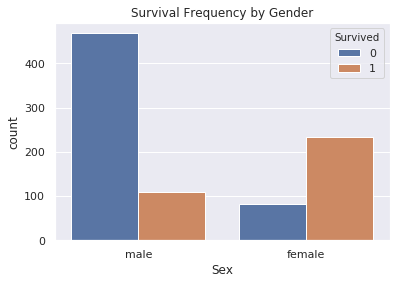

In [119]:
#Write code here
ax = sns.countplot(x="Sex", hue="Survived", data=titanic_df)
plt.title('Survival Frequency by Gender')
plt.show()

# Q4(.5) What is your observation from this plot.

Write observation  here

Amost twice as many females survived than males and almost five times as many males did not survive as females. 



We can't use name as a feature for building any machine learning classifier(logistic regression). Let's look at Name columns and see if we can think of a better features for name.

In [120]:
titanic_df['Name'].sample(30)

590                               Rintamaki, Mr. Matti
707                  Calderhead, Mr. Edward Pennington
555                                 Wright, Mr. George
281                   Olsson, Mr. Nils Johan Goransson
715         Soholt, Mr. Peter Andreas Lauritz Andersen
371                          Wiklund, Mr. Jakob Alfred
634                                 Skoog, Miss. Mabel
549                     Davies, Master. John Morgan Jr
473       Jerwan, Mrs. Amin S (Marie Marthe Thuillard)
138                                Osen, Mr. Olaf Elon
794                              Dantcheff, Mr. Ristiu
235                       Harknett, Miss. Alice Phoebe
875                   Najib, Miss. Adele Kiamie "Jane"
351             Williams-Lambert, Mr. Fletcher Fellows
62                         Harris, Mr. Henry Birkhardt
692                                       Lam, Mr. Ali
397                            McKane, Mr. Peter David
22                         McGowan, Miss. Anna "Annie"
300       

# Q5.(.5 points) Can you suggest a feature based on *Name* columns 

Write 
your
suggestion
here

The feature I would suggest is extracting the string that directily follows the comma as each name is in a format of last name, comma, title and then first name. 

# Q6(.5 points) Create a new feature named *Title* from the *Name* columns.

Hint: Here are different title

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'Countess',
       'Jonkheer.'], dtype=object)
       
       
You can look in wikipedia see what different title meant that time.

In [121]:
# Write code here
lista = ['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.', 'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'Countess', 'Jonkheer.']
titanic_df['Title'] = titanic_df.Name.str.extract(', (\w*\.?) ')
titanic_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

# Q 7 (. 5 points) Using seaborn, plot survival based on Title. Display separate plot for male and female.

Text(0.5, 1.0, 'Survival Count for Males')

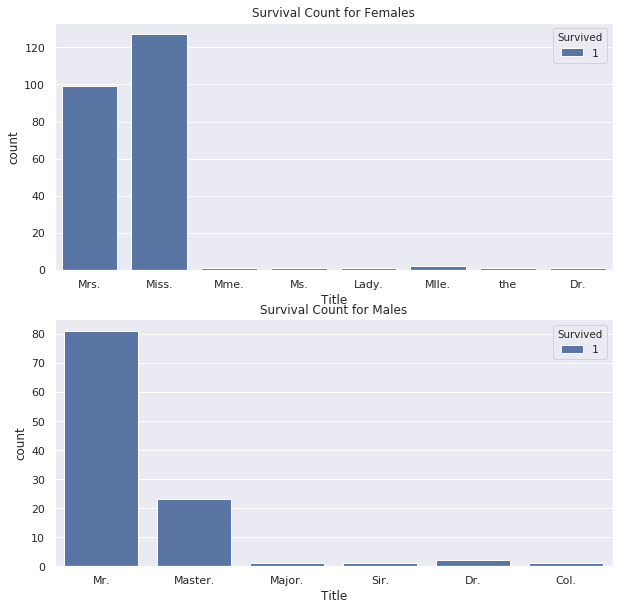

In [122]:
# Write code here


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[10,10])
g1 = sns.countplot(x='Title', hue='Survived', data=titanic_df[(titanic_df['Sex'] == 'female') & (titanic_df['Survived'] == 1)], ax=ax1)
g2 = sns.countplot(x='Title', hue='Survived', data=titanic_df[(titanic_df['Sex'] == 'male') & (titanic_df['Survived'] == 1)], ax=ax2)
g1.set_title('Survival Count for Females')
g2.set_title('Survival Count for Males')


# Q 8(.5 points) What is your observation from these plots


Write your observation here
There were a lot more women that survived than men by about double. 

Let's fix Age nan issue. It has 167 nan values.

# Q9 (.5 points) Fill the Age nan value by the mean for each **Title** group.

In [123]:
# Write code here
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df.groupby('Title')['Age'].transform('mean'))

In [124]:
sum(titanic_df[titanic_df['Title'] == 'Mr.']['Age'])/len(titanic_df[titanic_df['Title'] == 'Mr.']['Age'])
titanic_df
#Just to check that the number that replaced line 5 is accurate. 

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
5                                     Moran, Mr. James    male  32.368090   
6                              McCarthy, Mr. Timothy J    male  54.000000   
7                       Palsson, Master. Gosta Leonard    male   2.000000   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.000000   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.000000   
10                     Sandstrom, Miss. Marguerite Rut  female   4.000000   
11                            Bonnell, Miss. Elizabeth  female  58.000000   
12                      Saundercock, Mr. William Henry    male  20.000000   
13                         Andersson, Mr. Anders Johan    male  39.000000   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.000000   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.000000   
16                                Rice, Master. Eugene    male   2.000000   
17                        Williams, Mr. Charles Eugene    male  32.368090   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.000000   
19                             Masselmani, Mrs. Fatima  female  35.898148   
20                             

In [125]:
# Let's see if there are still some NAN 
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin_type       0
Title            0
dtype: int64

There are two record with missing Embarked value.

In [126]:
# Let's drop these two record
titanic_df.dropna(subset=['Embarked'], inplace=True)

In [127]:
titanic_df.Sex = np.where(titanic_df['Sex'] =='male', 1, 0)

In [128]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Cabin_type      object
Title           object
dtype: object

In [129]:
titanic_clean_df= titanic_df[[
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Cabin_type',
 'Title']]

In [130]:
titanic_clean_df.head(10)

Survived  Pclass  Sex       Age  SibSp  Parch     Fare Embarked Cabin_type  \
0         0       3    1  22.00000      1      0   7.2500        S          n   
1         1       1    0  38.00000      1      0  71.2833        C          C   
2         1       3    0  26.00000      0      0   7.9250        S          n   
3         1       1    0  35.00000      1      0  53.1000        S          C   
4         0       3    1  35.00000      0      0   8.0500        S          n   
5         0       3    1  32.36809      0      0   8.4583        Q          n   
6         0       1    1  54.00000      0      0  51.8625        S          E   
7         0       3    1   2.00000      3      1  21.0750        S          n   
8         1       3    0  27.00000      0      2  11.1333        S          n   
9         1       2    0  14.00000      1      0  30.0708        C          n   

     Title  
0      Mr.  
1     Mrs.  
2    Miss.  
3     Mrs.  
4      Mr.  
5      Mr.  
6      Mr.  
7  Master.  
8     Mrs.  
9     Mrs.

# Q10.(.5 points) Using titanic_clean_df  convert  *Title* and *Cabin_type* into dummy columns.

In [131]:
# Write code here
titanic_clean_df = pd.get_dummies(titanic_clean_df, columns = ['Title'])
titanic_clean_df = pd.get_dummies(titanic_clean_df, columns = ['Cabin_type'])


In [132]:
titanic_clean_df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title_Capt.  \
0         0       3    1  22.0      1      0   7.2500        S            0   
1         1       1    0  38.0      1      0  71.2833        C            0   
2         1       3    0  26.0      0      0   7.9250        S            0   
3         1       1    0  35.0      1      0  53.1000        S            0   
4         0       3    1  35.0      0      0   8.0500        S            0   

   Title_Col.      ...       Title_the  Cabin_type_A  Cabin_type_B  \
0           0      ...               0             0             0   
1           0      ...               0             0             0   
2           0      ...               0             0             0   
3           0      ...               0             0             0   
4           0      ...               0             0             0   

   Cabin_type_C  Cabin_type_D  Cabin_type_E  Cabin_type_F  Cabin_type_G  \
0             0             0             0             0             0   
1             1             0             0             0             0   
2             0             0             0             0             0   
3             1             0             0             0             0   
4             0             0             0             0             0   

   Cabin_type_T  Cabin_type_n  
0             0             1  
1             0             0  
2             0             1  
3             0             0  
4             0             1  

[5 rows x 34 columns]

In [133]:
titanic_clean_df.dtypes

Survived             int64
Pclass               int64
Sex                  int64
Age                float64
SibSp                int64
Parch                int64
Fare               float64
Embarked            object
Title_Capt.          uint8
Title_Col.           uint8
Title_Don.           uint8
Title_Dr.            uint8
Title_Jonkheer.      uint8
Title_Lady.          uint8
Title_Major.         uint8
Title_Master.        uint8
Title_Miss.          uint8
Title_Mlle.          uint8
Title_Mme.           uint8
Title_Mr.            uint8
Title_Mrs.           uint8
Title_Ms.            uint8
Title_Rev.           uint8
Title_Sir.           uint8
Title_the            uint8
Cabin_type_A         uint8
Cabin_type_B         uint8
Cabin_type_C         uint8
Cabin_type_D         uint8
Cabin_type_E         uint8
Cabin_type_F         uint8
Cabin_type_G         uint8
Cabin_type_T         uint8
Cabin_type_n         uint8
dtype: object

# Q11.(.5) Plot headmap of correlation using titanic_df

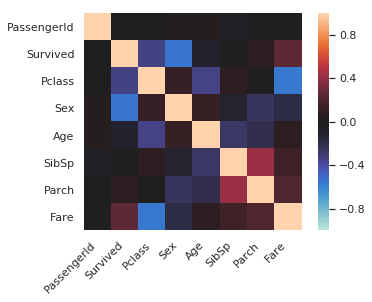

In [134]:
# Write code here
corr = titanic_df.corr()
ax = sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#Interpreting this to say heatmap instead of headmap. 

# Q 12.(.5) What are your observation from this heatmap.

Write observation here
There doesn't seem to be very strong correlation within the variables. Sex and Survived seem to have a negative correlation and the same as Fare and PClass as well. SibSip and Parch seem to have a postive correlation. 

 

Note that correlation  measures **linear relationships** and is defined for numeric attributes. Also, be careful that
there need not the a linear relationship between variables(Survived vs any other attributes).

For categorical variable, we need to use a different measure of association.

- [Cramér's V, measure of association between two nominal variables](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

It is based on a nominal variation of Pearson’s Chi-Square Test.

Let's use this implementation from stack overflow
https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792. It shows usage for **tips** dataset from seaborn.

Let's copy paste this here

In [141]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

Let's work with  titanic dataset again


# Q 13(.5 points) Copy titanic_df into titanic_df_small  Dataframe.  Only select record with Title value = *Master., Miss., Mr. or Mrs.*     into titanic_df_small.

You can check other title doesn't have enough record, hence ignoring them from our analysis.

In [136]:
# Write code here
titanic_df_small = titanic_df[titanic_df['Title'].isin(['Master.','Miss.','Mr.','Mrs.'])]
titanic_df_small

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
860          861         0       3   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.000000      1   
2                               Heikkinen, Miss. Laina    0  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.000000      1   
4                             Allen, Mr. William Henry    1  35.000000      0   
5                                     Moran, Mr. James    1  32.368090      0   
6                              McCarthy, Mr. Timothy J    1  54.000000      0   
7                       Palsson, Master. Gosta Leonard    1   2.000000      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0  27.000000      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)    0  14.000000      1   
10                     Sandstrom, Miss. Marguerite Rut    0   4.000000      1   
11                            Bonnell, Miss. Elizabeth    0  58.000000      0   
12                      Saundercock, Mr. William Henry    1  20.000000      0   
13                         Andersson, Mr. Anders Johan    1  39.000000      1   
14                Vestrom, Miss. Hulda Amanda Adolfina    0  14.000000      0   
15                    Hewlett, Mrs. (Mary D Kingcome)     0  55.000000      0   
16                                Rice, Master. Eugene    1   2.000000      4   
17                        Williams, Mr. Charles Eugene    1  32.368090      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...    0  31.000000      1   
19                          

# Q 14 (.5 points) Using pandas cross tabulate *Survived* and *Title* in titanic_df_small. Also compute cramers_v for association between *Survived* and *Title*.

In [145]:
# Write code here

confusion_matrix = pd.crosstab(titanic_df_small['Survived'], titanic_df_small['Title'])
#result = cramers_v(confusion_matrix) did not work as there was an issue with the formual provided. 




#To be safe, I found a way to calculate this value on line so that I can have a value to discuss.
#cramers_V = SQRT( c2 / (n (k - 1)) )

chi = ss.chi2_contingency(confusion_matrix)[0]
n = confusion_matrix.sum()
cramers_v = np.sqrt(chi / (n*(min(confusion_matrix.shape)-1)))
cramers_v



Title
Master.    2.651161
Miss.      1.246312
Mr.        0.737430
Mrs.       1.505758
dtype: float64

# Q 15(.5 points) Using sklearn library, Label encode *Title* in titanic_df_small into a new column called *Encoded_title*

In [138]:
# Write code here
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
titanic_df_small['Encoded_title'] = le.fit_transform(titanic_df_small.Title.dropna())
titanic_df_small

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
860          861         0       3   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.000000      1   
2                               Heikkinen, Miss. Laina    0  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.000000      1   
4                             Allen, Mr. William Henry    1  35.000000      0   
5                                     Moran, Mr. James    1  32.368090      0   
6                              McCarthy, Mr. Timothy J    1  54.000000      0   
7                       Palsson, Master. Gosta Leonard    1   2.000000      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0  27.000000      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)    0  14.000000      1   
10                     Sandstrom, Miss. Marguerite Rut    0   4.000000      1   
11                            Bonnell, Miss. Elizabeth    0  58.000000      0   
12                      Saundercock, Mr. William Henry    1  20.000000      0   
13                         Andersson, Mr. Anders Johan    1  39.000000      1   
14                Vestrom, Miss. Hulda Amanda Adolfina    0  14.000000      0   
15                    Hewlett, Mrs. (Mary D Kingcome)     0  55.000000      0   
16                                Rice, Master. Eugene    1   2.000000      4   
17                        Williams, Mr. Charles Eugene    1  32.368090      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...    0  31.000000      1   
19                          

# Q 16(.5 points) Calculate correlation coefficients between *Survived* and *Encoded_title*.

In [139]:
# Write code here
titanic_df_small['Survived'].corr(titanic_df_small['Encoded_title'])

-0.07287583211561172

# Q 17. (.5 points) Whats is your observation between using cramer_v and correlation coefficients for  *Survived* and *Encoded_title/Title*.

Write observation here
The correlation coefficient between Survived and Encoded_title is a negative number very close to zero, therefore it shows that there is a very weak negative correlation between Survived and Encoded_title. 
The caramer_v values had high absolute values showing strong correlation between the diffrent titles and the survival rates. 
